In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load metrics for baseline 50 stars
extra_stars_list = [50, 100, 200, 500, 1000, 2000]
metrics_list_100 = [np.load('metrics-polypsf_model_100_{}.npy'.format(n_stars), allow_pickle=True)[()] for n_stars in extra_stars_list]

# Load baseline metrics
metrics_baseline = np.load('../../psf_model/outputs/wf-outputs/pretrained_models/metrics/metrics-polypsf_model_100.npy', allow_pickle=True)[()]
metrics_endline = np.load('../../psf_model/outputs/wf-outputs/pretrained_models/metrics/metrics-polypsf_model_2000.npy', allow_pickle=True)[()]

In [4]:
rel_err_100 = [metrics_['test_metrics']['poly_metric']['rel_rmse'] for metrics_ in metrics_list_100]
rel_err_100_std = [metrics_['test_metrics']['poly_metric']['std_rel_rmse'] for metrics_ in metrics_list_100]
rel_err_base = metrics_baseline['test_metrics']['poly_metric']['rel_rmse']
rel_err_base_std = metrics_baseline['test_metrics']['poly_metric']['std_rel_rmse']
rel_err_end = metrics_endline['test_metrics']['poly_metric']['rel_rmse']
rel_err_end_std = metrics_endline['test_metrics']['poly_metric']['std_rel_rmse']


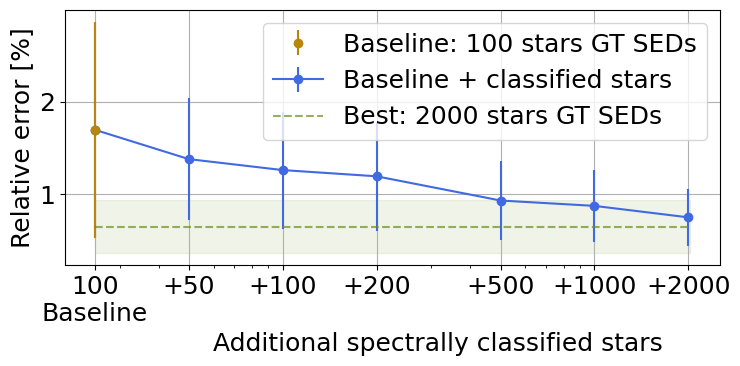

In [7]:
# Set the font size
plt.rcParams.update({'font.size': 18})
# Plot the metrics
plt.figure(figsize=(8, 4))

plt.errorbar([25]+extra_stars_list, [rel_err_base]+rel_err_100, yerr=[rel_err_base_std]+rel_err_100_std, color='royalblue', fmt='o-', label='Baseline + classified stars')
plt.errorbar([25], [rel_err_base], yerr=[rel_err_base_std], fmt='o', color='darkgoldenrod', label='Baseline: 100 stars GT SEDs')
# plt.fill_between([25]+extra_stars_list, np.array([rel_err_base]+rel_err_50)-np.array([rel_err_base_std]+rel_err_50_std), np.array([rel_err_base]+rel_err_50)+np.array([rel_err_base_std]+rel_err_50_std), color='cornflowerblue', alpha=0.1)
plt.hlines(rel_err_end, 25, 2025, colors='olivedrab', linestyles='dashed', label='Best: 2000 stars GT SEDs', alpha=0.7)
plt.fill_between([25, 2025], [rel_err_end-rel_err_end_std]*2, [rel_err_end+rel_err_end_std]*2, color='olivedrab', alpha=0.1)
plt.xscale('log')
plt.grid()
plt.xlabel('Additional spectrally classified stars', x=0.57)
plt.xticks([25]+extra_stars_list, ['100\nBaseline', '+50', '+100', '+200', '+500', '+1000', '+2000'])
plt.ylabel('Relative error [%]')

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.tight_layout()
# plt.savefig('../figs/extra_stars_psf_improvement_base_100.pdf')

In [8]:
# print the relative errors
print('Baseline: {:f} +/- {:f}'.format(rel_err_base, rel_err_base_std))
for n_stars, rel_err, rel_err_std in zip(extra_stars_list, rel_err_100, rel_err_100_std):
    print('Extra stars: {:d} -> {:f} +/- {:f}'.format(n_stars, rel_err, rel_err_std))

print('GT stars:  2000  -> {:f} +/- {:f}'.format(rel_err_end, rel_err_end_std))

Baseline: 1.698206 +/- 1.170299
Extra stars: 50 -> 1.381418 +/- 0.662025
Extra stars: 100 -> 1.263013 +/- 0.632066
Extra stars: 200 -> 1.195871 +/- 0.586653
Extra stars: 500 -> 0.933914 +/- 0.430248
Extra stars: 1000 -> 0.875960 +/- 0.390168
Extra stars: 2000 -> 0.752016 +/- 0.310918
GT stars:  2000  -> 0.650154 +/- 0.287306
